In [1]:
import pandas as pd
import requests
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from src.train import modelTraining
from sklearn.metrics import r2_score, mean_squared_error
import math

# Option 1: Transforming the alphabetic values in numeric values, then predicting

In [2]:
diamond_train = pd.read_csv('./output/diamond_train_alpha_to_num.csv', index_col=0)
diamond_test = pd.read_csv('./output/diamond_test_alpha_to_num.csv', index_col=0)

In [3]:
diamond_train.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,3,5,4,62.8,56.0,4.29,4.31,2.70,605
1,0.34,4,6,3,62.6,55.0,4.46,4.49,2.80,565
2,0.40,3,7,3,60.3,62.0,4.70,4.75,2.85,720
3,0.40,5,3,5,61.8,59.2,4.72,4.74,2.92,793
4,0.90,3,7,3,61.0,63.0,6.10,6.13,3.73,4381


In [4]:
diamond_test.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,4,2,2,60.8,54.0,8.68,8.57,5.24
1,2.04,4,3,2,62.0,56.0,8.18,8.23,5.09
2,0.51,4,2,3,61.7,54.0,5.18,5.19,3.20
3,0.30,4,2,3,61.3,56.0,4.32,4.33,2.65
4,0.96,1,3,4,68.8,56.0,6.11,5.98,4.16


In [5]:
X = diamond_train.drop(columns=['price'])
y = diamond_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


In [6]:
models={'Linear Regression': LinearRegression(),
            'Decission Tree': DecisionTreeRegressor(),
            'Random forest': RandomForestRegressor(),
            }

In [7]:
modelTraining(models,X_train, y_train, X_test, y_test)

Linear Regression training complete
Decission Tree training complete
Random forest training complete


In [8]:
def modelPredict(models, X_train, y_train, X_test, y_test):
    results = dict()
    for modelName, model in models.items():
        y_pred = model.predict(X_test)
        results[modelName] = y_pred
        r2 = r2_score(y_test, y_pred)
        print(f"{modelName}: r2 score = {round(r2, 4)}")
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        print(f"{modelName}: rmse = {round(rmse, 4)}")
    return results

In [9]:
y_predicts = modelPredict(models,X_train, y_train, X_test, y_test)

Linear Regression: r2 score = 0.8989
Linear Regression: rmse = 1255.3492
Decission Tree: r2 score = 0.9649
Decission Tree: rmse = 740.0978
Random forest: r2 score = 0.9797
Random forest: rmse = 562.4177


In [10]:
y_predicts

{'Linear Regression': array([-733.62277999, 5392.09816893, 8599.29901996, ..., 3831.43522328,
        3030.80827739, 2664.73439843]),
 'Decission Tree': array([  373.,  4413., 10076., ...,  3121.,  2980.,  2278.]),
 'Random forest': array([ 437.86      , 4801.40933333, 9661.66      , ..., 3179.83      ,
        2702.15      , 2398.11      ])}

In [11]:
results = pd.DataFrame(y_predicts)

In [12]:
results['Linear Regression']

0        -733.622780
1        5392.098169
2        8599.299020
3        1790.123312
4        2548.037293
            ...     
8086    14779.361412
8087     -224.806819
8088     3831.435223
8089     3030.808277
8090     2664.734398
Name: Linear Regression, Length: 8091, dtype: float64

In [13]:
results["y_test"] = y_test.values

In [14]:
pd.DataFrame(results)

,Linear Regression,Decission Tree,Random forest,y_test
0,-733.622780,373.0,437.860000,394
1,5392.098169,4413.0,4801.409333,4871
2,8599.299020,10076.0,9661.660000,10669
3,1790.123312,1558.0,1802.040000,1758
4,2548.037293,1950.0,1914.030000,1950
...,...,...,...,...
8086,14779.361412,17068.0,16894.230000,14238
8087,-224.806819,675.0,674.760000,675
8088,3831.435223,3121.0,3179.830000,3057
8089,3030.808277,2980.0,2702.150000,2724


In [103]:
import matplotlib. pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

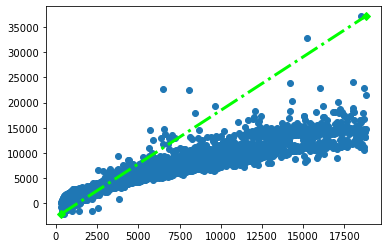

In [100]:
plot1_alph_num = plt.figure()
plt.scatter(y_test,results['Linear Regression'])
plt.plot([y_test.min(), y_test.max()], [results['Linear Regression'].min(), results['Linear Regression'].max()], 'D-.',color='lime', lw=3)

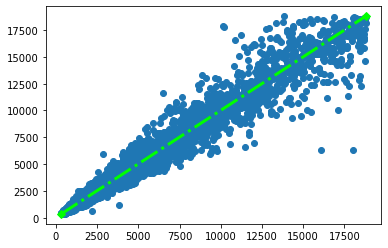

In [101]:
plot2_alph_num = plt.figure()
plt.scatter(y_test,results['Decission Tree'])
plt.plot([y_test.min(), y_test.max()], [results['Decission Tree'].min(), results['Decission Tree'].max()], 'D-.',color='lime', lw=3)

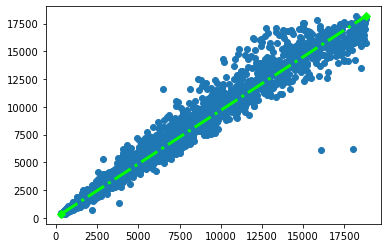

In [102]:
plot3_alph_num = plt.figure()
plt.scatter(y_test,results['Random forest'])
plt.plot([y_test.min(), y_test.max()], [results['Random forest'].min(), results['Random forest'].max()], 'D-.',color='lime', lw=3)

Text(0.5, 0, 'RMSE: 562.4177')

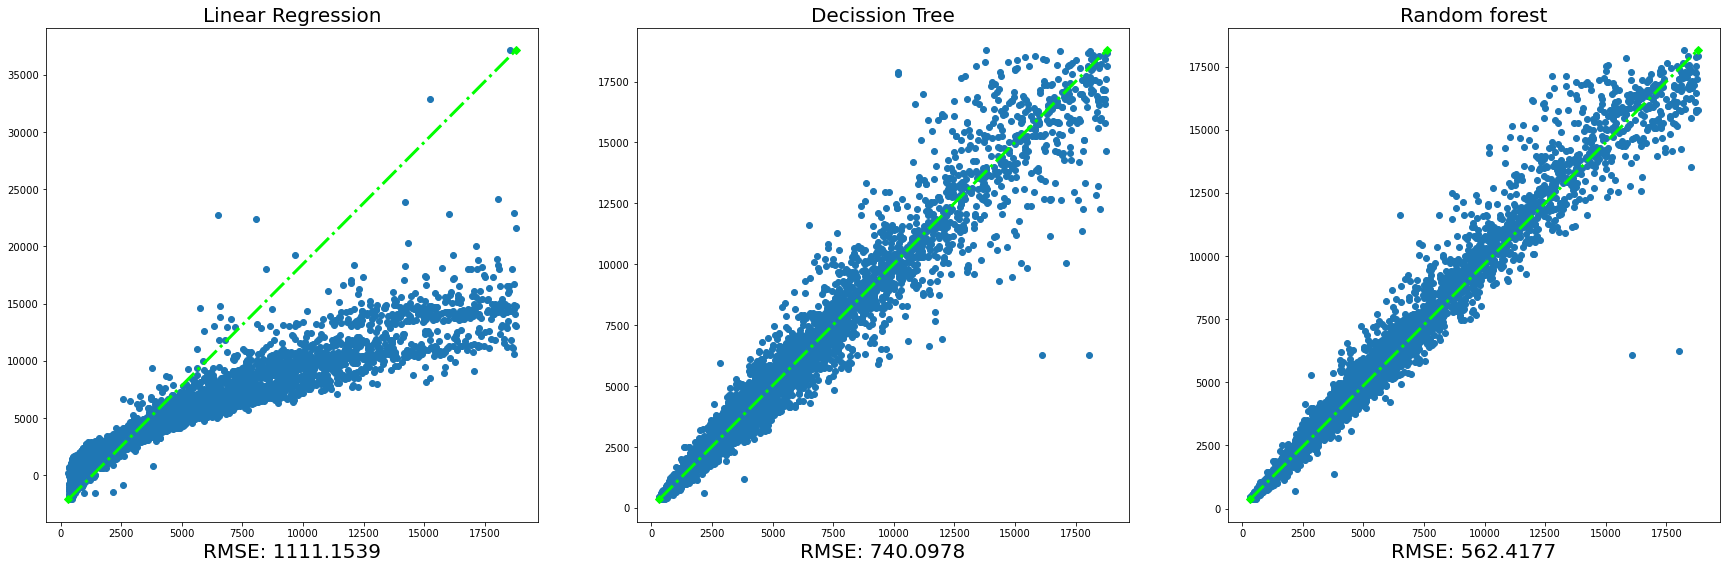

In [144]:
figures_alph_num = plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plt.scatter(y_test,results['Linear Regression'])
plt.plot([y_test.min(), y_test.max()], [results['Linear Regression'].min(), results['Linear Regression'].max()], 'D-.',color='lime', lw=3)
plt.title('Linear Regression', fontsize=20)
plt.xlabel('RMSE: 1111.1539', fontsize=20)

plt.subplot(2,3,2)
plt.scatter(y_test,results['Decission Tree'])
plt.plot([y_test.min(), y_test.max()], [results['Decission Tree'].min(), results['Decission Tree'].max()], 'D-.',color='lime', lw=3)
plt.title('Decission Tree', fontsize=20)
plt.xlabel('RMSE: 740.0978', fontsize=20)

plt.subplot(2,3,3)
plt.scatter(y_test,results['Random forest'])
plt.plot([y_test.min(), y_test.max()], [results['Random forest'].min(), results['Random forest'].max()], 'D-.',color='lime', lw=3)
plt.title('Random forest', fontsize=20)
plt.xlabel('RMSE: 562.4177', fontsize=20)

### PREDICTION

In [15]:
final_results = dict()
for modelName, model in models.items():
    print(f"predicting with {modelName}")
    y_pred = model.predict(diamond_test)
    final_results[modelName] = y_pred

predicting with Linear Regression
predicting with Decission Tree
predicting with Random forest


In [16]:
final_results

{'Linear Regression': array([16776.97701604, 13854.17360867,   176.22132306, ...,
         3597.05203744,  1764.72670528,  4223.53866634]),
 'Decission Tree': array([16937., 15288.,   950., ...,  2170.,  1097.,  2869.]),
 'Random forest': array([14923.01, 15691.57,   991.79, ...,  2415.99,  1064.31,  2672.98])}

In [17]:
results_df = pd.DataFrame(final_results['Random forest']).reset_index()
results_df = results_df.rename(columns={"index": "id", 0: "price"})

In [18]:
results_df

,id,price
0,0,14923.01
1,1,15691.57
2,2,991.79
3,3,442.69
4,4,3496.48
...,...,...
13480,13480,2648.21
13481,13481,5095.99
13482,13482,2415.99
13483,13483,1064.31


In [19]:
#results_df.to_csv('./output/prediction_random_forest_alpha_to_num.csv', index=False)

# Option 2: Use get_dummies to obtain numeric values for the aforementioned columns

In [81]:
diamond_train_dummies = pd.read_csv('./output/diamond_train_dummies.csv', index_col=0)
diamond_test_dummies = pd.read_csv('./output/diamond_test_dummies.csv', index_col=0)

In [82]:
diamond_train_dummies.head(5)

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
diamond_test_dummies.head(5)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,2.36,60.8,54.0,8.68,8.57,5.24,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,2.04,62.0,56.0,8.18,8.23,5.09,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.51,61.7,54.0,5.18,5.19,3.20,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.30,61.3,56.0,4.32,4.33,2.65,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0.96,68.8,56.0,6.11,5.98,4.16,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
X_d = diamond_train_dummies.drop(columns=['price'])
y_d = diamond_train_dummies['price']
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


In [85]:
modelTraining(models,X_train_d, y_train_d, X_test_d, y_test_d)

Linear Regression training complete
Decission Tree training complete
Random forest training complete


In [86]:
y_predicts_d = modelPredict(models,X_train_d, y_train_d, X_test_d, y_test_d)

Linear Regression: r2 score = 0.9192
Linear Regression: rmse = 1111.1539
Decission Tree: r2 score = 0.9629
Decission Tree: rmse = 752.6831
Random forest: r2 score = 0.9804
Random forest: rmse = 547.6452


In [87]:
y_predicts_d

{'Linear Regression': array([2072.5  , 4163.   , 1167.125, ..., 2240.875, 3949.875,  745.375]),
 'Decission Tree': array([1187., 3307.,  953., ..., 1689., 3473.,  828.]),
 'Random forest': array([1210.04, 3465.18, 1087.35, ..., 1722.04, 3504.94,  822.47])}

In [88]:
results_d = pd.DataFrame(y_predicts_d)

In [89]:
results_d

,Linear Regression,Decission Tree,Random forest
0,2072.500,1187.0,1210.04
1,4163.000,3307.0,3465.18
2,1167.125,953.0,1087.35
3,6522.375,6968.0,7177.21
4,3896.500,3131.0,2991.55
...,...,...,...
8086,17580.625,17891.0,16408.10
8087,8862.250,9525.0,10117.48
8088,2240.875,1689.0,1722.04
8089,3949.875,3473.0,3504.94


In [90]:
results_d["y_test"] = y_test_d.values

In [91]:
results_d

,Linear Regression,Decission Tree,Random forest,y_test
0,2072.500,1187.0,1210.04,1187
1,4163.000,3307.0,3465.18,2893
2,1167.125,953.0,1087.35,927
3,6522.375,6968.0,7177.21,7357
4,3896.500,3131.0,2991.55,2697
...,...,...,...,...
8086,17580.625,17891.0,16408.10,17829
8087,8862.250,9525.0,10117.48,9698
8088,2240.875,1689.0,1722.04,1758
8089,3949.875,3473.0,3504.94,3740


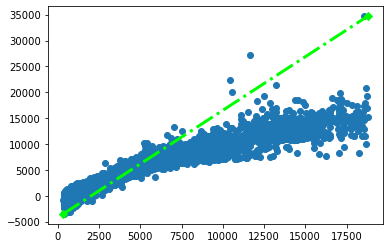

In [105]:
plot1_dummies = plt.figure()
plt.scatter(y_test_d,results_d['Linear Regression'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Linear Regression'].min(), results_d['Linear Regression'].max()], 'D-.',color='lime', lw=3)

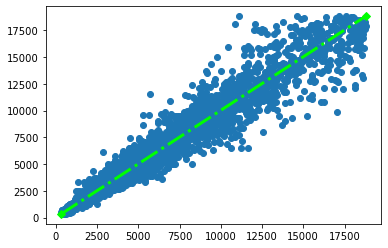

In [106]:
plot2_dummies = plt.figure()
plt.scatter(y_test_d,results_d['Decission Tree'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Decission Tree'].min(), results_d['Decission Tree'].max()], 'D-.',color='lime', lw=3)

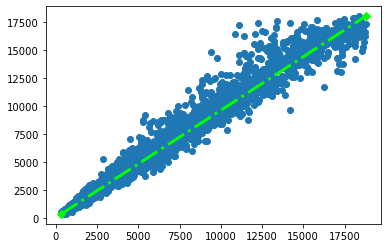

In [107]:
plot3_dummies = plt.figure()
plt.scatter(y_test_d,results_d['Random forest'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Random forest'].min(), results_d['Random forest'].max()], 'D-.',color='lime', lw=3)

Text(0.5, 0, 'RMSE: 547.6452')

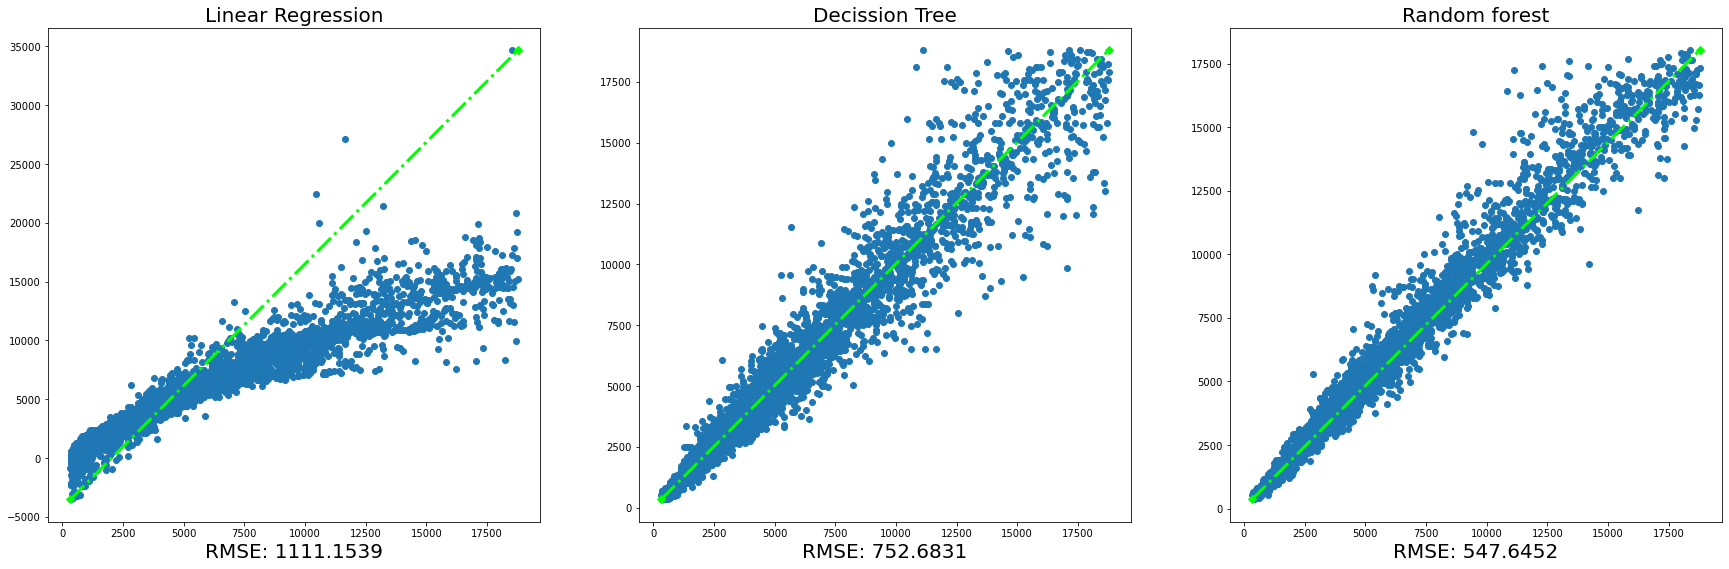

In [143]:
figures_dummies = plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plt.scatter(y_test_d,results_d['Linear Regression'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Linear Regression'].min(), results_d['Linear Regression'].max()], 'D-.',color='lime', lw=3)
plt.title('Linear Regression', fontsize=20)
plt.xlabel('RMSE: 1111.1539', fontsize=20)

plt.subplot(2,3,2)
plt.scatter(y_test_d,results_d['Decission Tree'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Decission Tree'].min(), results_d['Decission Tree'].max()], 'D-.',color='lime', lw=3)
plt.title('Decission Tree', fontsize=20)
plt.xlabel('RMSE: 752.6831', fontsize=20)


plt.subplot(2,3,3)
plt.scatter(y_test_d,results_d['Random forest'])
plt.plot([y_test_d.min(), y_test_d.max()], [results_d['Random forest'].min(), results_d['Random forest'].max()], 'D-.',color='lime', lw=3)
plt.title('Random forest', fontsize=20)
plt.xlabel('RMSE: 547.6452', fontsize=20)


In [145]:
pp = PdfPages('results.pdf')
pp.savefig(figures_alph_num)
pp.savefig(figures_dummies)
pp.close()

### PREDICTION

In [ ]:
final_results_d = dict()
for modelName, model in models.items():
    print(f"predicting with {modelName}")
    y_pred = model.predict(diamond_test_dummies)
    final_results_d[modelName] = y_pred

In [ ]:
final_results_d

In [ ]:
results_df_dec_tree = pd.DataFrame(final_results['Decission Tree']).reset_index()
results_df_dec_tree = results_df_dec_tree.rename(columns={"index": "id", 0: "price"})
results_df_dec_tree

In [ ]:
results_df_rand_for = pd.DataFrame(final_results['Random forest']).reset_index()
results_df_rand_for = results_df_rand_for.rename(columns={"index": "id", 0: "price"})
results_df_rand_for

In [ ]:
#results_df_dec_tree.to_csv('./output/prediction_decission_tree_dummies.csv', index=False)

In [ ]:
#results_df_rand_for.to_csv('./output/prediction_random_forest_dummies.csv', index=False)